In [6]:
import numpy as np
import pandas as pd


In [8]:
df = pd.read_csv("/content/car.csv")
df

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...,...
1723,1723,low,low,5more,more,med,med,good
1724,1724,low,low,5more,more,med,high,vgood
1725,1725,low,low,5more,more,big,low,unacc
1726,1726,low,low,5more,more,big,med,good


In [9]:
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
df.shape

(1728, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1728 non-null   int64 
 1   buying      1728 non-null   object
 2   maint       1728 non-null   object
 3   doors       1728 non-null   object
 4   persons     1728 non-null   object
 5   lug_boot    1728 non-null   object
 6   safety      1728 non-null   object
 7   class       1728 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [12]:
df.describe()

,Unnamed: 0
count,1728.000000
mean,863.500000
std,498.974949
min,0.000000
25%,431.750000
50%,863.500000
75%,1295.250000
max,1727.000000


In [13]:
df.nunique()

,0
Unnamed: 0,1728
buying,4
maint,4
doors,4
persons,3
lug_boot,3
safety,3
class,4


In [14]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1723,False
1724,False
1725,False
1726,False


In [15]:
df.shape

(1728, 8)

In [16]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [17]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [18]:
# prompt: Using dataframe df: convert the categorical variable into numerical variable

# Import necessary libraries
import pandas as pd

# Convert categorical columns to numerical using Label Encoding
for col in ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']:
    # Create a dictionary to map categories to numerical values
    labels = {value: i for i, value in enumerate(df[col].unique())}
    # Replace categories with numerical values
    df[col] = df[col].map(labels)

# Display the modified DataFrame (optional)
# print(df.head())


In [19]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [20]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
1723,3,3,3,2,1,1,3
1724,3,3,3,2,1,2,2
1725,3,3,3,2,2,0,0
1726,3,3,3,2,2,1,3


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.drop(columns=["class"])
y = df["class"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = model.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1,
       2, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0,

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)


KNeighborsClassifier()

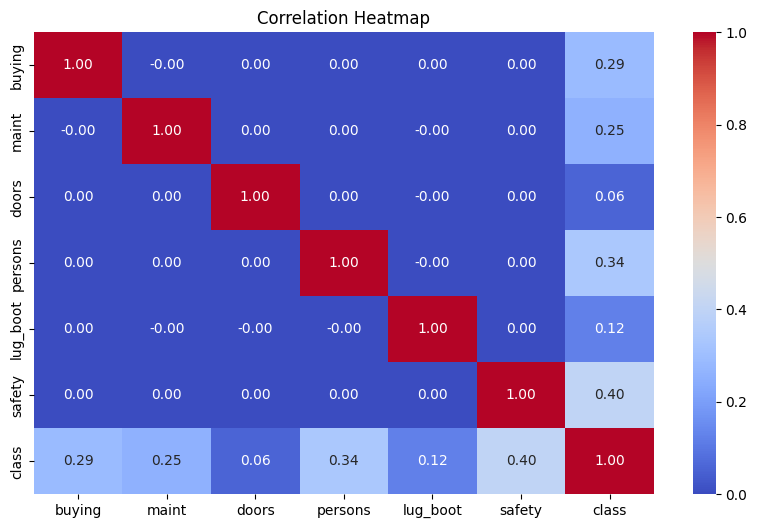

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix
corr = df.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

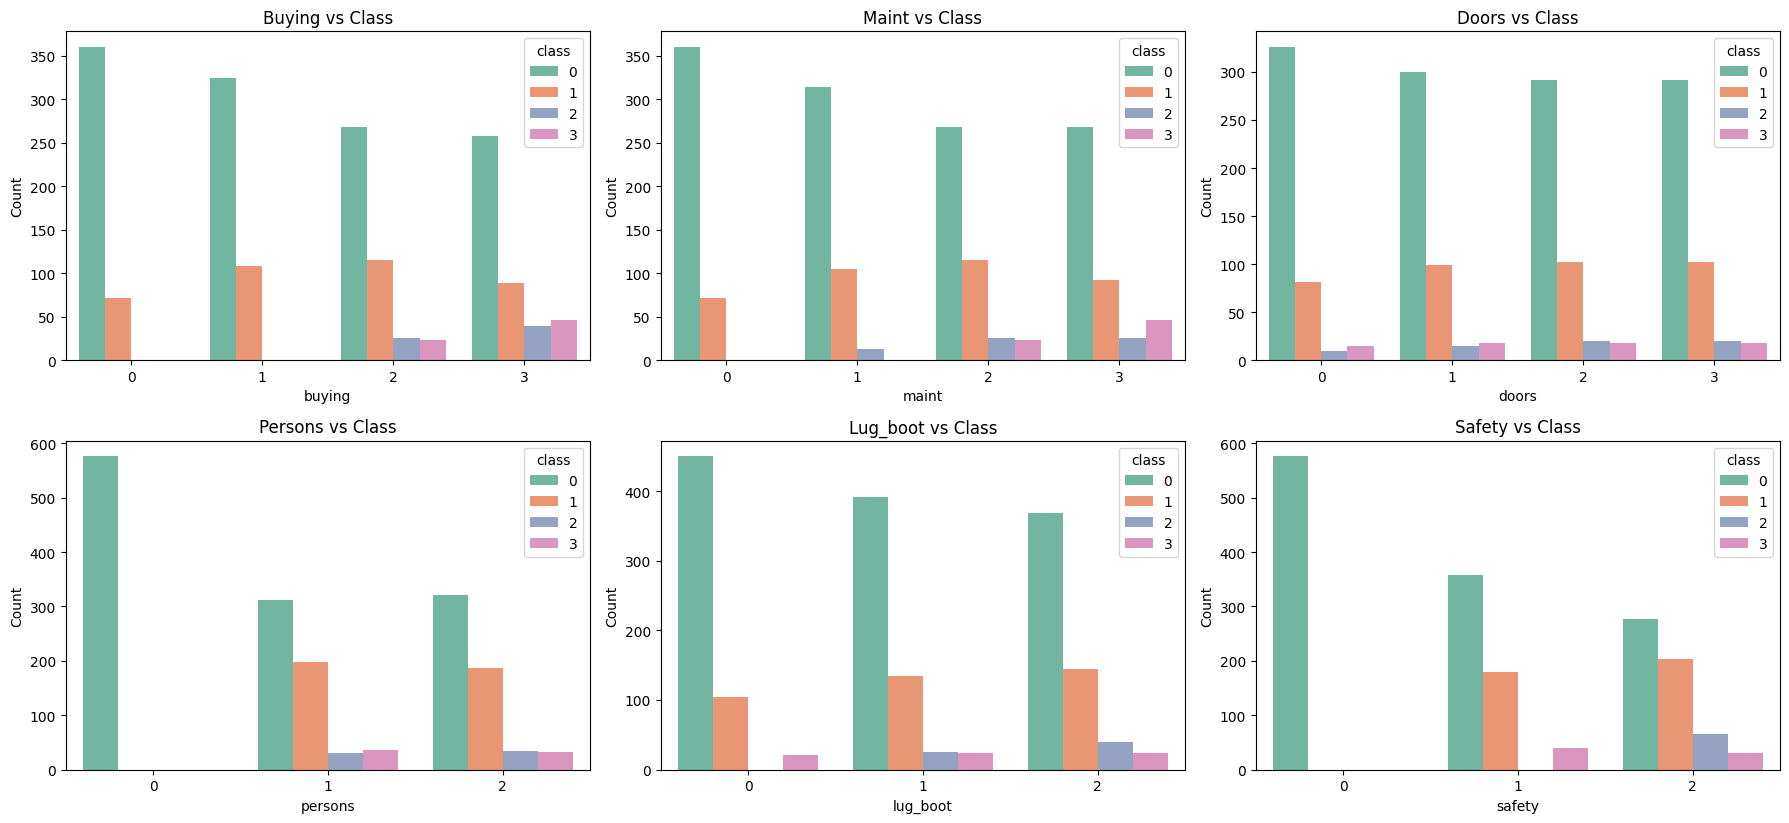

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot target vs each feature
features = df.columns[:-1]  # all except target
target = 'class'

plt.figure(figsize=(18, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature, hue=target, palette='Set2')
    plt.title(f'{feature.capitalize()} vs Class')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)

    acc= accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='macro')
    rec = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds, average='macro')

    results.append([name, acc, prec, rec, f1])

# Display results as a DataFrame
comparison_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(comparison_df.sort_values(by="F1 Score", ascending=False))


                 Model  Accuracy  Precision    Recall  F1 Score
2        Random Forest  0.971098   0.881805  0.934798  0.895374
3        Decision Tree  0.962428   0.879159  0.906047  0.879339
1                  KNN  0.913295   0.885217  0.760615  0.810526
0  Logistic Regression  0.812139   0.739077  0.652555  0.683043
